In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('flights.csv')

In [2]:
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [3]:
data.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

<AxesSubplot:>

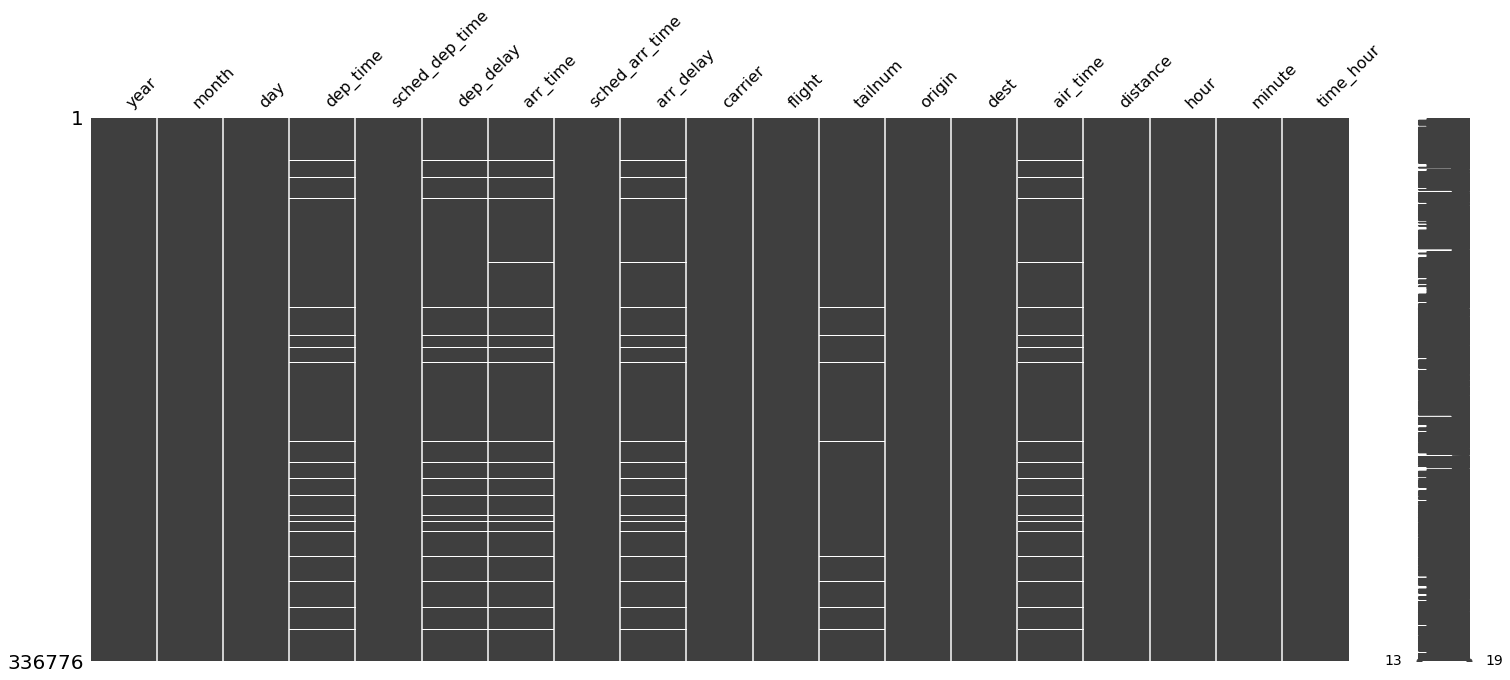

In [36]:
%matplotlib inline
import missingno as msno
#visualizing relationships between columns with missing values
msno.matrix(data)

##### From the charts, missing values in 'dep_delay' explains the missing values in 'dep_time' ,'arr_delay' and 'arr_time'

#### Find all the flights that flew to Houston (IAH or HOU) 

In [5]:
#finding all the flights that flew to Houston(IAH or HOUb)
var = data.groupby(['dest'])['flight'].sum().to_dict()
var['HOU'] + var['IAH']

9625610

 #### Find all the flights that were operated by United, American, or Delta 

In [6]:
data['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [7]:
#finding all the flights that flew to Houston(IAH or HOUb)
xer = data.groupby(['carrier'])['flight'].sum().to_dict()
xer['US'] + xer['AA'] + xer['DL']

129589285

#### Find all the flights that departed in Summer (July, August, and September) 

In [8]:
fer = data.groupby(['month'])['flight'].sum().to_dict()
fer[7] + fer[8] + fer[9]


171008601

#### Find all the flights that arrived more than two hours late, but didn’t leave late 

In [9]:
per = data.groupby(['sched_dep_time','arr_time'])['flight'].count().reset_index()
per

,sched_dep_time,arr_time,flight
0,500,614.0,1
1,500,618.0,3
2,500,619.0,4
3,500,620.0,6
4,500,621.0,7
...,...,...,...
92902,2359,652.0,1
92903,2359,700.0,2
92904,2359,723.0,1
92905,2359,758.0,1


In [10]:
data2 = data.copy()
data2.dropna(how = 'any',axis=0,inplace=True)

In [11]:
data2.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [12]:
data2.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [13]:
data2.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object